In [1]:
#import pandas_profiling
#!pip install bayesian-optimization
from bayes_opt import BayesianOptimization
import category_encoders as ce
import gzip
import matplotlib as mpb
import numpy as np
import pandas as pd
import pickle
from sklearn.compose import ColumnTransformer
import xgboost as xgb

In [2]:
detailed_listing = 'http://data.insideairbnb.com/united-states/ca/los-angeles/2019-12-05/data/listings.csv.gz'
summary_listing = 'http://data.insideairbnb.com/united-states/ca/los-angeles/2019-12-05/visualisations/listings.csv'

In [3]:
det_list = pd.read_csv(detailed_listing, compression='gzip', error_bad_lines=False, warn_bad_lines=False)

print(det_list.shape)
det_list.head()

(40125, 106)


d:\csfiles\lambda\git\airbnb3\airenv\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20191205175409,2019-12-06,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,...,f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20191205175409,2019-12-06,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,...,t,f,flexible,f,f,1,1,0,0,0.19
2,2708,https://www.airbnb.com/rooms/2708,20191205175409,2019-12-06,Mirrored Mini-Suite with Fireplace - W. Hollywood,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,0.33
3,2732,https://www.airbnb.com/rooms/2732,20191205175409,2019-12-06,Zen Life at the Beach,NaN,This is a three story townhouse with the follo...,This is a three story townhouse with the follo...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,0.19
4,2864,https://www.airbnb.com/rooms/2864,20191205175409,2019-12-07,*Upscale Professional Home with Beautiful Studio*,Centrally located.... Furnished with 42 inch S...,The space is furnished with Thomasville furnit...,Centrally located.... Furnished with 42 inch S...,none,What makes the neighborhood unique is that the...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN


In [4]:
summary_list = pd.read_csv(summary_listing, error_bad_lines=False, warn_bad_lines=False )

print(summary_list.shape)
summary_list.head()

(40125, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98209,-118.38494,Entire home/apt,122,30,2,2016-05-15,0.02,1,248
1,344,Family perfect;Pool;Near Studios!,767,Melissa,Other Cities,Burbank,34.16562,-118.33458,Entire home/apt,168,2,8,2019-10-19,0.19,1,62
2,2708,Mirrored Mini-Suite with Fireplace - W. Hollywood,3008,Chas.,City of Los Angeles,Hollywood,34.09768,-118.34602,Private room,79,30,22,2019-08-31,0.33,2,252
3,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00475,-118.48127,Private room,140,1,20,2019-10-03,0.19,2,344
4,2864,*Upscale Professional Home with Beautiful Studio*,3207,Bernadine,Other Cities,Bellflower,33.87619,-118.11397,Entire home/apt,80,2,0,NaN,NaN,1,0


In [5]:
# Data Exploration
list(summary_list.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [6]:
# Data Exploration
list(det_list.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [7]:
det_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20191205175409,2019-12-06,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,...,f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20191205175409,2019-12-06,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,...,t,f,flexible,f,f,1,1,0,0,0.19
2,2708,https://www.airbnb.com/rooms/2708,20191205175409,2019-12-06,Mirrored Mini-Suite with Fireplace - W. Hollywood,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,0.33
3,2732,https://www.airbnb.com/rooms/2732,20191205175409,2019-12-06,Zen Life at the Beach,NaN,This is a three story townhouse with the follo...,This is a three story townhouse with the follo...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,0.19
4,2864,https://www.airbnb.com/rooms/2864,20191205175409,2019-12-07,*Upscale Professional Home with Beautiful Studio*,Centrally located.... Furnished with 42 inch S...,The space is furnished with Thomasville furnit...,Centrally located.... Furnished with 42 inch S...,none,What makes the neighborhood unique is that the...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN


In [8]:
columns = ['price', 'beds', 'bedrooms', 'bathrooms', 'zipcode', 
           'property_type', 'room_type', 'accommodates', 'cleaning_fee',
           'guests_included',  'instant_bookable', 'amenities']

train = det_list[columns]

train.head()

,price,beds,bedrooms,bathrooms,zipcode,property_type,room_type,accommodates,cleaning_fee,guests_included,instant_bookable,amenities
0,$122.00,3.0,2.0,2.0,90230,Condominium,Entire home/apt,6,$240.00,3,f,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."
1,$168.00,3.0,3.0,1.0,91505,House,Entire home/apt,6,$100.00,6,t,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."
2,$79.00,1.0,1.0,1.5,90046,Apartment,Private room,1,$87.00,1,t,"{Internet,Wifi,""Air conditioning"",""Wheelchair ..."
3,$140.00,1.0,1.0,1.0,90405,Apartment,Private room,1,$100.00,1,f,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S..."
4,$80.00,1.0,1.0,1.0,90706,Apartment,Entire home/apt,2,$75.00,1,f,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."


In [9]:
# Feature Engineering!

def create_bool_from_dict(df, seriesdict, feature):
    df[feature] = df[seriesdict].str.contains(feature)
    return df[feature]

amenities_list = ['TV', 'Wifi', 'Kitchen', 'Air conditioning', 'Pool', 'Hot tub',
                  'Washer', 'Dryer', 'Regrigerator', 'Iron', 'Free parking on premises',
                 'Dishes and silverware', 'Microwave']

for x in amenities_list:
    create_bool_from_dict(train, 'amenities', x)

train.head()


d:\csfiles\lambda\git\airbnb3\airenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,price,beds,bedrooms,bathrooms,zipcode,property_type,room_type,accommodates,cleaning_fee,guests_included,...,Air conditioning,Pool,Hot tub,Washer,Dryer,Regrigerator,Iron,Free parking on premises,Dishes and silverware,Microwave
0,$122.00,3.0,2.0,2.0,90230,Condominium,Entire home/apt,6,$240.00,3,...,True,True,True,True,True,False,True,True,False,False
1,$168.00,3.0,3.0,1.0,91505,House,Entire home/apt,6,$100.00,6,...,True,True,False,True,True,False,True,False,True,True
2,$79.00,1.0,1.0,1.5,90046,Apartment,Private room,1,$87.00,1,...,True,False,True,True,True,False,True,True,True,True
3,$140.00,1.0,1.0,1.0,90405,Apartment,Private room,1,$100.00,1,...,False,False,False,True,True,False,False,False,False,False
4,$80.00,1.0,1.0,1.0,90706,Apartment,Entire home/apt,2,$75.00,1,...,True,False,True,True,True,False,False,True,False,False


In [10]:
# Data Exploration
print(train.isna().sum())

price                          0
beds                          92
bedrooms                      70
bathrooms                     25
zipcode                      464
property_type                  0
room_type                      0
accommodates                   0
cleaning_fee                5238
guests_included                0
instant_bookable               0
amenities                      0
TV                             0
Wifi                           0
Kitchen                        0
Air conditioning               0
Pool                           0
Hot tub                        0
Washer                         0
Dryer                          0
Regrigerator                   0
Iron                           0
Free parking on premises       0
Dishes and silverware          0
Microwave                      0
dtype: int64


In [11]:
#Data Cleaning
train['price'] = train['price'].str.replace('$','')
train['price'] = train['price'].str.replace(',','').astype('float')

train['beds'] = train['beds'].fillna(train['beds'].mode()[0])
train['beds'] = train['beds'].astype(int)


train['zipcode'] = train['zipcode'].str.strip()
train['zipcode'] = np.where(train['zipcode'].str.contains('ca', case = False), '', train['zipcode'])
train['zipcode'] = train['zipcode'].str.replace(' ', '')
train['zipcode'] = train['zipcode'].str.replace('139SValenciaAve,Glendora.', '')
train['zipcode'] = train['zipcode'].str[:5]
train['zipcode'] = train['zipcode'].replace('',np.nan)
train['zipcode'] = train['zipcode'].astype(str)


train['cleaning_fee'] = train['cleaning_fee'].str.replace('$','')
train['cleaning_fee'] = train['cleaning_fee'].str.replace(',','')
train['cleaning_fee'] = train['cleaning_fee'].astype(float)


train['instant_bookable'] = np.where(train['instant_bookable'].str.contains('t'), 1, 0)

d:\csfiles\lambda\git\airbnb3\airenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\csfiles\lambda\git\airbnb3\airenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
d:\csfiles\lambda\git\airbnb3\airenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [12]:
# Data Exploration
train.dtypes

price                       float64
beds                          int32
bedrooms                    float64
bathrooms                   float64
zipcode                      object
property_type                object
room_type                    object
accommodates                  int64
cleaning_fee                float64
guests_included               int64
instant_bookable              int32
amenities                    object
TV                             bool
Wifi                           bool
Kitchen                        bool
Air conditioning               bool
Pool                           bool
Hot tub                        bool
Washer                         bool
Dryer                          bool
Regrigerator                   bool
Iron                           bool
Free parking on premises       bool
Dishes and silverware          bool
Microwave                      bool
dtype: object

In [13]:
# Data Exploration
train.head()

,price,beds,bedrooms,bathrooms,zipcode,property_type,room_type,accommodates,cleaning_fee,guests_included,...,Air conditioning,Pool,Hot tub,Washer,Dryer,Regrigerator,Iron,Free parking on premises,Dishes and silverware,Microwave
0,122.0,3,2.0,2.0,90230,Condominium,Entire home/apt,6,240.0,3,...,True,True,True,True,True,False,True,True,False,False
1,168.0,3,3.0,1.0,91505,House,Entire home/apt,6,100.0,6,...,True,True,False,True,True,False,True,False,True,True
2,79.0,1,1.0,1.5,90046,Apartment,Private room,1,87.0,1,...,True,False,True,True,True,False,True,True,True,True
3,140.0,1,1.0,1.0,90405,Apartment,Private room,1,100.0,1,...,False,False,False,True,True,False,False,False,False,False
4,80.0,1,1.0,1.0,90706,Apartment,Entire home/apt,2,75.0,1,...,True,False,True,True,True,False,False,True,False,False


In [14]:
# Features we want
categorical_features = ['zipcode','property_type','room_type']
numeric_features = ['price', 'beds', 'bedrooms', 'bathrooms', 'accommodates','guests_included', 'instant_bookable', 'cleaning_fee']
bool_features = ['tv', 'wifi', 'kitchen', 'air_conditioning', 'pool', 'hot_tub', 'washer', 'dryer', 'refrigerator', 'iron', 'free_parking', 'dishes_and_silverware', 'microwave']

# Changing all column names to lowercase, inserting underscores
renamer = dict(zip(amenities_list, bool_features))
print(renamer)

{'TV': 'tv', 'Wifi': 'wifi', 'Kitchen': 'kitchen', 'Air conditioning': 'air_conditioning', 'Pool': 'pool', 'Hot tub': 'hot_tub', 'Washer': 'washer', 'Dryer': 'dryer', 'Regrigerator': 'refrigerator', 'Iron': 'iron', 'Free parking on premises': 'free_parking', 'Dishes and silverware': 'dishes_and_silverware', 'Microwave': 'microwave'}


In [15]:
train = train.rename(columns=renamer)
train.head()

,price,beds,bedrooms,bathrooms,zipcode,property_type,room_type,accommodates,cleaning_fee,guests_included,...,air_conditioning,pool,hot_tub,washer,dryer,refrigerator,iron,free_parking,dishes_and_silverware,microwave
0,122.0,3,2.0,2.0,90230,Condominium,Entire home/apt,6,240.0,3,...,True,True,True,True,True,False,True,True,False,False
1,168.0,3,3.0,1.0,91505,House,Entire home/apt,6,100.0,6,...,True,True,False,True,True,False,True,False,True,True
2,79.0,1,1.0,1.5,90046,Apartment,Private room,1,87.0,1,...,True,False,True,True,True,False,True,True,True,True
3,140.0,1,1.0,1.0,90405,Apartment,Private room,1,100.0,1,...,False,False,False,True,True,False,False,False,False,False
4,80.0,1,1.0,1.0,90706,Apartment,Entire home/apt,2,75.0,1,...,True,False,True,True,True,False,False,True,False,False


In [16]:
# Checking Cardinality
categorical_counts = []
categorical_counts.append(train[categorical_features].nunique().sort_values())
high_cardi_cols = []
low_cardi_cols = []
for i in categorical_features:
    if train[i].nunique() > 150:
        high_cardi_cols.append(i)
    else:
        low_cardi_cols.append(i)

In [17]:
print(categorical_counts, high_cardi_cols, low_cardi_cols)

[room_type          4
property_type     44
zipcode          295
dtype: int64] ['zipcode'] ['property_type', 'room_type']


In [18]:
'''
# Not being used right now but saving for later
ct = ColumnTransformer([("oe", ce.OrdinalEncoder(), high_cardi_cols),
                        ("ohe", ce.OneHotEncoder(use_cat_names=True), low_cardi_cols)])
'''

'\n# Not being used right now but saving for later\nct = ColumnTransformer([("oe", ce.OrdinalEncoder(), high_cardi_cols),\n                        ("ohe", ce.OneHotEncoder(use_cat_names=True), low_cardi_cols)])\n'

In [19]:
# We'll impute missing values using the median for numeric columns and the most
# common value for string columns.

from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)

train = DataFrameImputer().fit_transform(train)

In [20]:
# Encoding!
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for feature in categorical_features:
    train[feature] = label_encoder.fit_transform(train[feature])

In [21]:
train.head()

,price,beds,bedrooms,bathrooms,zipcode,property_type,room_type,accommodates,cleaning_fee,guests_included,...,air_conditioning,pool,hot_tub,washer,dryer,refrigerator,iron,free_parking,dishes_and_silverware,microwave
0,122.0,3,2.0,2.0,77,15,0,6,240.0,3,...,True,True,True,True,True,False,True,True,False,False
1,168.0,3,3.0,1.0,229,25,0,6,100.0,6,...,True,True,False,True,True,False,True,False,True,True
2,79.0,1,1.0,1.5,50,1,2,1,87.0,1,...,True,False,True,True,True,False,True,True,True,True
3,140.0,1,1.0,1.0,113,1,2,1,100.0,1,...,False,False,False,True,True,False,False,False,False,False
4,80.0,1,1.0,1.0,133,1,0,2,75.0,1,...,True,False,True,True,True,False,False,True,False,False


In [22]:
# Beginning train/test split
features = numeric_features + categorical_features + bool_features
target = 'price'
train_features = train[features]

In [23]:
train_labels = train_features['price']
train_features = train_features.drop(columns=['price'])

In [24]:
X_train = train_features
y_train = train_labels

X_train.shape, y_train.shape

((40125, 23), (40125,))

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size = 0.75, 
                                                  test_size = 0.25, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((30093, 23), (10032, 23), (30093,), (10032,))

In [26]:
#Training!

from xgboost import XGBRegressor


eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model = XGBRegressor(n_estimators=1000, n_jobs=-1)
model.fit(X_train, y_train, eval_set=eval_set, eval_metric='rmse', 
          early_stopping_rounds=100)



[18:01:51] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:664.634	validation_1-rmse:680.207
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:641.587	validation_1-rmse:659.62
[2]	validation_0-rmse:621.986	validation_1-rmse:643.174


d:\csfiles\lambda\git\airbnb3\airenv\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[3]	validation_0-rmse:603.79	validation_1-rmse:628.067
[4]	validation_0-rmse:588.374	validation_1-rmse:615.002
[5]	validation_0-rmse:574.812	validation_1-rmse:603.3
[6]	validation_0-rmse:563.858	validation_1-rmse:594.065
[7]	validation_0-rmse:553.464	validation_1-rmse:581.687
[8]	validation_0-rmse:543.999	validation_1-rmse:570.374
[9]	validation_0-rmse:535.545	validation_1-rmse:562.187
[10]	validation_0-rmse:526.773	validation_1-rmse:553.626
[11]	validation_0-rmse:519.062	validation_1-rmse:544.854
[12]	validation_0-rmse:513.554	validation_1-rmse:539.118
[13]	validation_0-rmse:508.306	validation_1-rmse:533.147
[14]	validation_0-rmse:502.951	validation_1-rmse:528.202
[15]	validation_0-rmse:499.22	validation_1-rmse:524.891
[16]	validation_0-rmse:494.734	validation_1-rmse:519.846
[17]	validation_0-rmse:491.522	validation_1-rmse:515.145
[18]	validation_0-rmse:488.804	validation_1-rmse:511.189
[19]	validation_0-rmse:486.136	validation_1-rmse:508.519
[20]	validation_0-rmse:483.875	validation_

[147]	validation_0-rmse:405.803	validation_1-rmse:464.739
[148]	validation_0-rmse:405.764	validation_1-rmse:464.647
[149]	validation_0-rmse:405.707	validation_1-rmse:464.585
[150]	validation_0-rmse:405.47	validation_1-rmse:464.351
[151]	validation_0-rmse:405.288	validation_1-rmse:464.274
[152]	validation_0-rmse:405.041	validation_1-rmse:464.319
[153]	validation_0-rmse:404.562	validation_1-rmse:464.21
[154]	validation_0-rmse:404.317	validation_1-rmse:464.215
[155]	validation_0-rmse:403.982	validation_1-rmse:463.981
[156]	validation_0-rmse:403.728	validation_1-rmse:463.994
[157]	validation_0-rmse:403.586	validation_1-rmse:463.87
[158]	validation_0-rmse:403.282	validation_1-rmse:464.135
[159]	validation_0-rmse:402.824	validation_1-rmse:464.78
[160]	validation_0-rmse:402.617	validation_1-rmse:464.64
[161]	validation_0-rmse:402.266	validation_1-rmse:464.498
[162]	validation_0-rmse:401.716	validation_1-rmse:464.714
[163]	validation_0-rmse:401.576	validation_1-rmse:464.785
[164]	validation_0-

[289]	validation_0-rmse:379.498	validation_1-rmse:463.608
[290]	validation_0-rmse:379.392	validation_1-rmse:463.618
[291]	validation_0-rmse:379.275	validation_1-rmse:463.479
[292]	validation_0-rmse:379.266	validation_1-rmse:463.479
[293]	validation_0-rmse:379.247	validation_1-rmse:463.487
[294]	validation_0-rmse:379.093	validation_1-rmse:463.158
[295]	validation_0-rmse:379.027	validation_1-rmse:463.151
[296]	validation_0-rmse:378.95	validation_1-rmse:463.158
[297]	validation_0-rmse:378.851	validation_1-rmse:462.87
[298]	validation_0-rmse:378.759	validation_1-rmse:462.922
[299]	validation_0-rmse:378.598	validation_1-rmse:462.843
[300]	validation_0-rmse:378.564	validation_1-rmse:462.807
[301]	validation_0-rmse:378.436	validation_1-rmse:462.841
[302]	validation_0-rmse:378.411	validation_1-rmse:462.821
[303]	validation_0-rmse:378.383	validation_1-rmse:462.783
[304]	validation_0-rmse:378.169	validation_1-rmse:462.839
[305]	validation_0-rmse:378.163	validation_1-rmse:462.828
[306]	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [27]:


file_name = "xgb_reg.pkl"

# save
pickle.dump(model, open(file_name, "wb"))

# load function
#gb_model_loaded = pickle.load(open(file_name, "rb"))

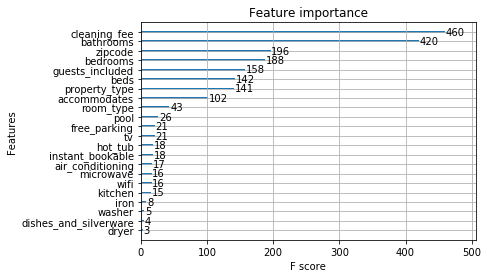

In [28]:
xgb.plot_importance(model)

In [29]:
# Convert processed data into an xgb.DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)

d:\csfiles\lambda\git\airbnb3\airenv\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [30]:
def xgb_evaluate(colsample_bytree, gamma, learning_rate, max_delta_step, max_depth_step, min_child_weight, n_estimators, subsample):
    params = {'colsample_bytree': colsample_bytree,
              'eta': 0.1,
              'eval_metric': 'rmse',
              'gamma': gamma,
              'learning_rate': learning_rate,
              'max_delta_step': max_delta_step,
              'max_depth_step': int(max_depth_step),
              'min_child_weight': min_child_weight,
              'n_estimators': n_estimators,
              'seed': 9,
              'subsample': subsample}
    # Use around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=1000, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [31]:
'''
Ended up not using the optimized model
xgb_bo = BayesianOptimization(xgb_evaluate, {'colsample_bytree': (0.3, 1),
                                             'gamma': (0, 5),
                                             'learning_rate':(0.01,0.5),
                                             'max_delta_step': (0, 10),
                                             'max_depth_step': (1, 6),
                                             'min_child_weight':(0,5),
                                             'n_estimators':(850, 1200),
                                             'subsample': (0.4, 1.0)})
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=6, n_iter=10, acq='ei')'''

"\nEnded up not using the optimized model\nxgb_bo = BayesianOptimization(xgb_evaluate, {'colsample_bytree': (0.3, 1),\n                                             'gamma': (0, 5),\n                                             'learning_rate':(0.01,0.5),\n                                             'max_delta_step': (0, 10),\n                                             'max_depth_step': (1, 6),\n                                             'min_child_weight':(0,5),\n                                             'n_estimators':(850, 1200),\n                                             'subsample': (0.4, 1.0)})\n# Use the expected improvement acquisition function to handle negative numbers\n# Optimally needs quite a few more initiation points and number of iterations\nxgb_bo.maximize(init_points=6, n_iter=10, acq='ei')"

In [32]:
file_name = "xgb_reg_bo.pkl"

# save
pickle.dump(model, open(file_name, "wb"))

# load
xgb_bo_loaded = pickle.load(open(file_name, "rb"))


[18:01:55] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [33]:
'''
# STRETCH
# Write our ensemble method - train 11 models, and weight them all equally by finding the mode of the votes for each well.
# The majority vote for each well is the consensus, which will be our predictions
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import random

random.seed(42)
count = 0
score = 0
scores = 0
prediction_votes=pd.DataFrame()
for num in range(1,2):
    seed = random.randint(1,9000)
    model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1, 
                          colsample_bynode=1, colsample_bytree=1, gamma=0,
                          importance_type='gain', learning_rate=0.1, max_delta_step=0,
                          max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
                          n_jobs=-1, nthread=None, objective='reg:squarederror', random_state=0,
                          reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                          silent=None, subsample=1, verbosity=1).fit(X_train, y_train)
    predictions = model.predict(X_val)
    #score = accuracy_score(y_val, predictions)
    prediction_votes[num] = predictions
    scores += score
    count += 1
    print(score)
    y_pred_proba = model.predict_proba(X_train)[:,1]
    print('Test ROC AUC:', roc_auc_score(y_train, y_pred_proba))

print(f"The average accuracy score using these hyperparams over {count} iterations is {scores/count}")'''

'\n# STRETCH\n# Write our ensemble method - train 11 models, and weight them all equally by finding the mode of the votes for each well.\n# The majority vote for each well is the consensus, which will be our predictions\nfrom sklearn.metrics import roc_auc_score\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.metrics import mean_squared_error\nimport random\n\nrandom.seed(42)\ncount = 0\nscore = 0\nscores = 0\nprediction_votes=pd.DataFrame()\nfor num in range(1,2):\n    seed = random.randint(1,9000)\n    model = xgb.XGBRegressor(base_score=0.5, booster=\'gbtree\', colsample_bylevel=1, \n                          colsample_bynode=1, colsample_bytree=1, gamma=0,\n                          importance_type=\'gain\', learning_rate=0.1, max_delta_step=0,\n                          max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,\n                          n_jobs=-1, nthread=None, objective=\'reg:squarederror\', random_state=0,\n                          reg_alpha=0

In [34]:
opt_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1, 
                          colsample_bynode=1, colsample_bytree=1, gamma=0,
                          importance_type='gain', learning_rate=0.1, max_delta_step=0,
                          max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
                          n_jobs=-1, nthread=None, objective='reg:squarederror', random_state=0,
                          reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                          silent=None, subsample=1, verbosity=1)
opt_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

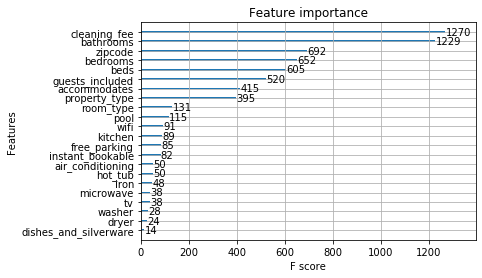

In [35]:
xgb.plot_importance(opt_model)

In [36]:
file_name = "opt_xgb_reg.pkl"

# save
pickle.dump(opt_model, open(file_name, "wb"))

In [37]:
# Testing

data = pd.DataFrame.from_dict([{'beds': 2, 'bedrooms': 2.0, 'bathrooms': 1.0, 'accommodates': 2, 'guests_included': 1,
                                'instant_bookable': 0, 'cleaning_fee': 70.0, 'zipcode': 90706, 'property_type': 'Apartment', 'room_type': 'Entire home/apt', 
                                'tv': True, 'wifi': True, 'kitchen': True, 'air_conditioning': True, 'pool': True,
                                'hot_tub': True, 'washer': True, 'dryer': False, 'refrigerator': True, 'iron' :True, 'free_parking' :True,
                                'dishes_and_silverware': False, 'microwave': True
                  }])

def encode_data(df):
    label_encoder = LabelEncoder()
    for feature in categorical_features:
        df[feature] = label_encoder.fit_transform(df[feature])
    return df

data = encode_data(data)

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
orig_preds = model.predict(X_val)
print(f'Mean Squared Error: {np.sqrt(mean_squared_error(y_val, orig_preds))}')
print(model.predict(data))

Mean Squared Error: 462.5507873274299
[214.13464]


In [43]:

opt_preds = opt_model.predict(X_val)
print(f'Mean Squared Error: {np.sqrt(mean_squared_error(y_val, opt_preds))}')
print(opt_model.predict(data))


Mean Squared Error: 462.31411415880115
[257.7331]
